In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['font.size'] =28
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.figsize'] = (8,8)

In [2]:
L_list=[0,16,32,64,128,256,512]
T_list=[0.88,0.885,0.89,0.891,0.892,0.89225,0.8925,0.89275,0.893,0.894,0.897,0.90]
T_list=np.array(T_list)
data=[]
for i in range(7):
    data.append(np.load("data_XY/XY_D40_L{}.npy".format(L_list[i])))

## Data description

L_list : L=0 is the data of the usual XY model. L=16~512 is the data of $\pi$-twist.

$\pi$-twist is the implementation of Eq.~(8) of [my paper](https://arxiv.org/pdf/2105.11460.pdf).

In [3]:
# T, L, D*D
print(data[0].shape)

(12, 16, 1600)


In [4]:
"""
L_list = 0 is a usual XY model, where L=64, for instance, is the π-twisted case for system size L=64.
"""

# L_max, T, L, n of xn(max: D*D)
for i in range(1,len(data)):
    print("L = ",L_list[i],"\t",data[i].shape)

L =  16 	 (12, 6, 1600)
L =  32 	 (12, 8, 1600)
L =  64 	 (12, 10, 1600)
L =  128 	 (12, 12, 1600)
L =  256 	 (12, 14, 1600)
L =  512 	 (12, 16, 1600)


#### The system size becomes $2\sqrt{2}^n$ after $n$ step of RG. Thus, we stop the RG at the appropriate RG steps depending on initialize_XY_twist(T,L). 

# Free boson spectrum

$$x_n = n^2K + \frac{m^2}{4K}$$
The Luttinger parameter $K$ is 2 for the BKT point of the XY model. The low-lying spectrum correspond to $n=0,m=\pm1,\pm2,\cdots$

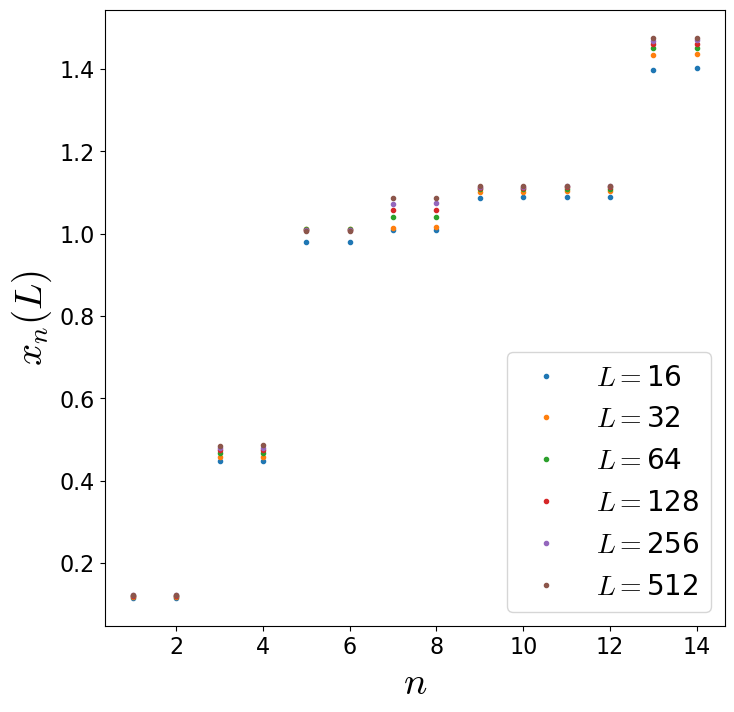

In [5]:
plt.figure(figsize=(8,8))
for i in range(5,16,2):
    plt.plot(range(1,15),data[0][11,i,1:15],".",label="$L = $"+str(2**(2+i//2)))
plt.xlabel("$n$",fontsize=28)
plt.ylabel("$x_n(L)$",fontsize=28)
plt.legend(fontsize=20)

In [6]:
#L,T
"""
Let's next read out x_W2 from PBC.(L=0)
"""

x_W2 = np.empty((6,12))
for i in range(6):
    for j in range(12):
        x_W2[i,j]=(0.5-data[0][j,5+2*i,3])*4

## $\pi$-twist spectrum
The ground state of the twisted spectrum is always $x_{V_{1/2}^s}$.

The position of the paired energy level $x_{V_{1/2}^c}$, however, depends on $T$ and $L$. We can distinguish these by identifying the isolated energy level.

Text(0.5, 1.0, 'π twist')

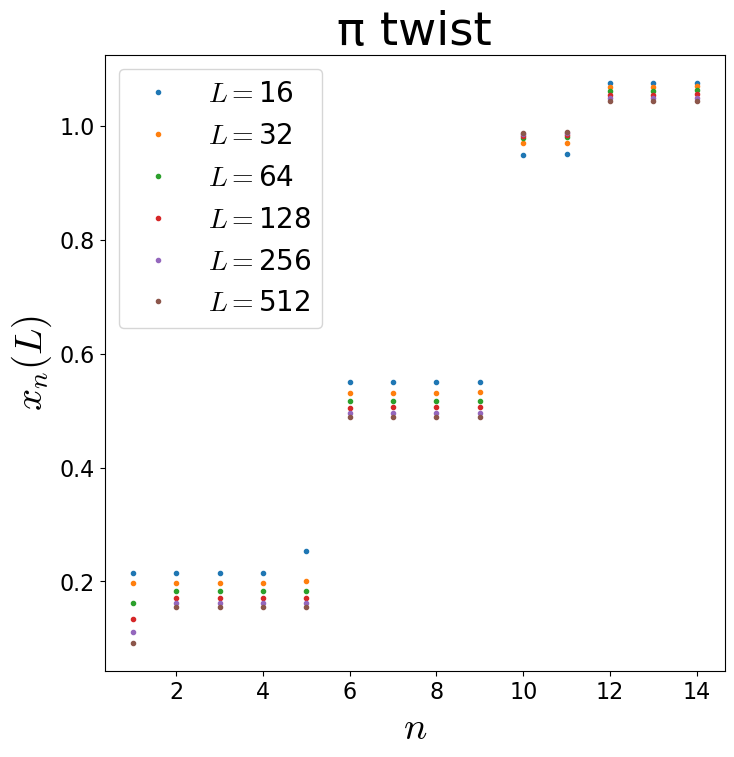

In [16]:
plt.figure(figsize=(8,8))
for i in range(1,len(L_list)):
    plt.plot(range(1,15),data[i][0,-1,1:15],".",label="$L = $"+str(L_list[i]))
plt.xlabel("$n$",fontsize=28)
plt.ylabel("$x_n(L)$",fontsize=28)
plt.legend(fontsize=20)
plt.title("π twist")

In this case, we can see that $x_{V_{1/2}^c}$ is either $x_1$ or $x_5$.

In [17]:
#L,T 
"""
In the twisted boundary conditions x_{V^s_{1/2}} is always the ground state.  
We define δxV12 = x_{V^c_{1/2}} - x_{V^s_{1/2}} for convenience.
the location of x_{V^c_{1/2}} depends on the system size so we need to be careful.
"""

# Let's first read out δxV12 from twisted boundary condition.
# π twist is realized at the corresponding system size/RG steps
δxV12 = np.empty((6,12))
for i in range(6):
    if i<2:
        δxV12[i] = data[i+1][:,5+i*2,5]
    else:
        δxV12[i] = data[i+1][:,5+2*i,1]

# https://journals.aps.org/prb/pdf/10.1103/PhysRevB.104.165132
yK_2nd = x_W2+δxV12**2
yV_2nd = δxV12/(1-0.5*yK_2nd)

In [18]:
T_list[[1,2,3,4,8,9,10]]

array([0.885, 0.89 , 0.891, 0.892, 0.893, 0.894, 0.897])

/tmp/ipykernel_33751/1528963550.py:24: RuntimeWarning: invalid value encountered in sqrt
  for i in range(12):Y_list3.append(np.sqrt(X_list**2-sa_list3[i]))


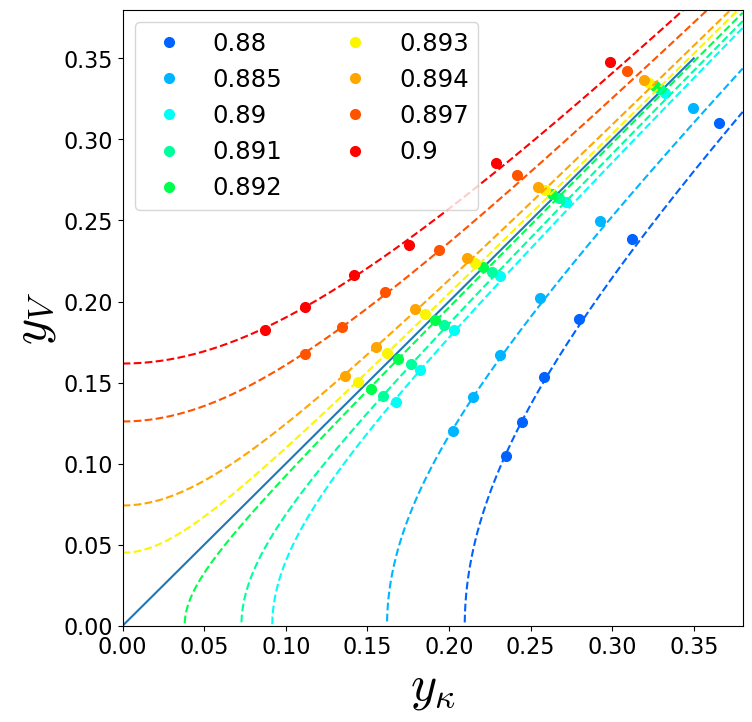

In [19]:
import matplotlib.cm as cm
trans_list=np.linspace(0,0.35,10)
plt.figure(figsize=(8,8))
num_list=[0,1,2,3,4,8,9,10,11]

plt.plot(trans_list,trans_list,"-")
for i in num_list:
    plt.plot(yK_2nd[:,i],yV_2nd[:,i],".",markersize=14,color=cm.hsv((11-i)/18.0),label=T_list[i])

plt.xlabel("$y_\kappa$",fontsize=36)
plt.legend(loc="upper left",fontsize=17.5,ncol=2)

plt.ylabel("$y_V$",fontsize=36)
plt.xlim(0.,0.38)
plt.ylim(0,0.38)
# plt.title("XY model")

sa_list3=[]
for i in range(12):
    sa_list3.append(yK_2nd[-2,i]**2-yV_2nd[-2,i]**2)
X_list=np.linspace(0,0.4,10000)

Y_list3=[]
for i in range(12):Y_list3.append(np.sqrt(X_list**2-sa_list3[i]))
for i in num_list:
    plt.plot(X_list,Y_list3[i],"--",markersize=16,color=cm.hsv((11-i)/18.0))

plt.savefig("RGflow_XY.png",bbox_inches='tight')